In [1]:
%pip install pymongo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pymongo import MongoClient

In [8]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import recall_score, f1_score
import matplotlib.pyplot as plt

In [9]:
#1
client = MongoClient("mongodb://localhost:27017")
db = client["institute_db"]
collection = db["applicant_details"]


In [94]:
df = pd.read_csv('New Institutes1.csv')

# df = pd.read_csv(r"C:\Users\22103336\Desktop\test2.csv")

print(df)

    S.No. Application Number Application Type  \
0     1.0          1-4645821    New Institute   
1     NaN          1-4645821    New Institute   
2     NaN          1-4645821    New Institute   
3     NaN          1-4645821    New Institute   
4     NaN          1-4645821    New Institute   
..    ...                ...              ...   
63    NaN          1-4514021    New Institute   
64    NaN          1-4514021    New Institute   
65    NaN          1-2181291    New Institute   
66    NaN          1-2181291    New Institute   
67    NaN          1-2181291    New Institute   

                                       Institute Name  \
0   ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...   
1   ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...   
2   ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...   
3   ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...   
4   ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...   
..                                                ...   
63          

In [76]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
S.No.                 28
Application Number     0
Application Type       0
Institute Name         0
Inst Address           0
Inst Address 2        20
CITY                   0
District               0
Pincode                0
Minority Institute    37
Womens institute      38
State                  0
Region                 0
Inst Type              0
Program                0
Course                 0
Level                  0
Specialization        11
Intake                 0
Approval               0
dtype: int64


In [77]:
df['State'].fillna(df['State'].mode()[0], inplace=True)
df['Region'].fillna(df['Region'].mode()[0], inplace=True)
df['Program'].fillna(df['Program'].mode()[0], inplace=True)
df['Course'].fillna(df['Course'].mode()[0], inplace=True)



df['Intake'].fillna(df['Intake'].median(), inplace=True)


In [78]:
pd.read_csv?

In [79]:
print(df)

    S.No. Application Number Application Type  \
0     1.0          1-4645821    New Institute   
1     NaN          1-4645821    New Institute   
2     NaN          1-4645821    New Institute   
3     NaN          1-4645821    New Institute   
4     NaN          1-4645821    New Institute   
5     2.0          1-9557561    New Institute   
6     3.0          1-9600671    New Institute   
7     NaN          1-9600671    New Institute   
8     NaN          1-9600671    New Institute   
9     NaN          1-9600671    New Institute   
10    NaN          1-9600671    New Institute   
11    NaN          1-9600671    New Institute   
12    4.0          1-5536381    New Institute   
13    NaN          1-5536381    New Institute   
14    NaN          1-5536381    New Institute   
15    NaN          1-5536381    New Institute   
16    NaN          1-5536381    New Institute   
17    NaN          1-5536381    New Institute   
18    5.0          1-2600621    New Institute   
19    6.0          1

In [80]:
data_dict = df.to_dict(orient="records")
collection.insert_many(data_dict)
print("Data inserted into MongoDB")

Data inserted into MongoDB


In [93]:
pipeline = [
    {"$group": {"_id": "$State", "applications_count": {"$sum": 1}}},
    {"$sort": {"applications_count": -1}}
]
state_applications = list(collection.aggregate(pipeline))
print(state_applications)

[{'_id': 'Haryana', 'applications_count': 45}, {'_id': 'Himachal Pradesh', 'applications_count': 30}, {'_id': 'Rajasthan', 'applications_count': 24}, {'_id': 'Punjab', 'applications_count': 15}]


In [82]:
print("Applications per state:")
for state in state_applications:
    print(state)

Applications per state:
{'_id': 'Haryana', 'applications_count': 45}
{'_id': 'Himachal Pradesh', 'applications_count': 30}
{'_id': 'Rajasthan', 'applications_count': 24}
{'_id': 'Punjab', 'applications_count': 15}


In [83]:
df['Approval'] = df['Approval'].apply(lambda x: 1 if x == 'Yes' else 0)

features = ['State', 'Region', 'Program', 'Course', 'Level', 'Specialization']
X = pd.get_dummies(df[features])  # One-hot encode categorical features
y = df['Approval']


In [84]:
# Train/Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [51]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


ValueError: The number of classes has to be greater than one; got 1 class

In [87]:
print("Naive Bayes:")
print(f"Recall: {recall_score(y_test, y_pred_nb)}")
print(f"F1 Score: {f1_score(y_test, y_pred_nb)}")

print("Linear SVM:")
print(f"Recall: {recall_score(y_test, y_pred_svm)}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm)}")


Naive Bayes:
Recall: 1.0
F1 Score: 1.0
Linear SVM:


NameError: name 'y_pred_svm' is not defined

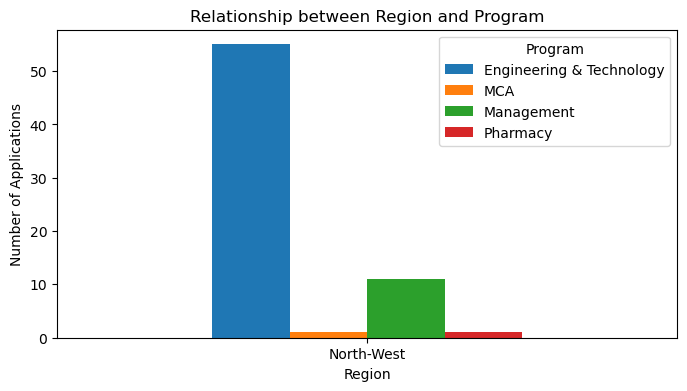

In [102]:
region_program_counts = df.groupby(['Region', 'Program']).size().unstack().fillna(0)
region_program_counts.plot(kind='bar', figsize=(8, 4))

plt.title('Relationship between Region and Program')
plt.xlabel('Region')
plt.ylabel('Number of Applications')
plt.xticks(rotation=0)
plt.show()